# `Term Frequency Inverse Document Frequency (TF-IDF)`
- penalising most frequent tokens
- but it will give importance to those tokens which have some sort of relationship with the frequent token.
- **Term frquency** = **no of times token appear in document/total no of tokens in the document**
- **Inverse document frequency** = **log(total no of document/no of document containing specific token)** 
- **TF-IDF** = **Term Frequency** * **Inverse document frequency**
![](tfidf.png)
- **here it shows some sort of relativity with high frequency tokens**

In [33]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import string
import re

### readymade package to do the cleaning part

In [34]:
# !pip install clean-text

In [35]:
from cleantext import clean

In [36]:
text = '''Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019.[7] The disease has since spread worldwide, leading to an ongoing pandemic.[8]

Symptoms of COVID‑19 are variable, but often include fever,[9] cough, headache,[10] fatigue, breathing difficulties, and loss of smell and taste.[11][12][13] Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms.[14] Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).[15] Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed.[16] Multi-year studies are underway to further investigate the long-term effects of the disease.[16]

COVID‑19 transmits when people breathe in air contaminated by droplets and small airborne particles containing the virus. The risk of breathing these in is highest when people are in close proximity, but they can be inhaled over longer distances, particularly indoors. Transmission can also occur if splashed or sprayed with contaminated fluids in the eyes, nose or mouth, and, rarely, via contaminated surfaces. People remain contagious for up to 20 days, and can spread the virus even if they do not develop symptoms.[17][18]

Several testing methods have been developed to diagnose the disease. The standard diagnostic method is by detection of the virus's nucleic acid by real-time reverse transcription polymerase chain reaction (rRT-PCR), transcription-mediated amplification (TMA), or by reverse transcription loop-mediated isothermal amplification (RT-LAMP) from a nasopharyngeal swab.

Several COVID-19 vaccines have been approved and distributed in various countries, which have initiated mass vaccination campaigns. Other preventive measures include physical or social distancing, quarantining, ventilation of indoor spaces, covering coughs and sneezes, hand washing, and keeping unwashed hands away from the face. The use of face masks or coverings has been recommended in public settings to minimize the risk of transmissions. While work is underway to develop drugs that inhibit the virus, the primary treatment is symptomatic. Management involves the treatment of symptoms, supportive care, isolation, and experimental measures.'''

In [37]:
text

"Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019.[7] The disease has since spread worldwide, leading to an ongoing pandemic.[8]\n\nSymptoms of COVID‑19 are variable, but often include fever,[9] cough, headache,[10] fatigue, breathing difficulties, and loss of smell and taste.[11][12][13] Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms.[14] Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).[15] Older people are at a higher risk of developing severe sympt

### cleaning the data

In [38]:
clean_data = clean(text,lower=True,no_urls=True,no_phone_numbers=True, no_emails=True,no_emoji=True,
                  no_currency_symbols=True,no_digits=True,no_numbers=True)

In [39]:
clean_data

"coronavirus disease <number> (covid-<number>) is a contagious disease caused by severe acute respiratory syndrome coronavirus <number> (sars-cov-<number>). the first known case was identified in wuhan, china, in december <number>.[<number>] the disease has since spread worldwide, leading to an ongoing pandemic.[<number>]\nsymptoms of covid00 are variable, but often include fever,[<number>] cough, headache,[<number>] fatigue, breathing difficulties, and loss of smell and taste.[<number>][<number>][<number>] symptoms may begin one to fourteen days after exposure to the virus. at least a third of people who are infected do not develop noticeable symptoms.[<number>] of those people who develop symptoms noticeable enough to be classed as patients, most (<number>%) develop mild to moderate symptoms (up to mild pneumonia), while <number>% develop severe symptoms (dyspnea, hypoxia, or more than <number>% lung involvement on imaging), and <number>% suffer critical symptoms (respiratory failure

In [40]:
vals = ['<number>','<email>']
cleantext = []
for i in vals:
    clean_data = clean_data.replace(i,' ')
cleantext.append(clean_data)    

In [41]:
cleantext

["coronavirus disease   (covid- ) is a contagious disease caused by severe acute respiratory syndrome coronavirus   (sars-cov- ). the first known case was identified in wuhan, china, in december  .[ ] the disease has since spread worldwide, leading to an ongoing pandemic.[ ]\nsymptoms of covid00 are variable, but often include fever,[ ] cough, headache,[ ] fatigue, breathing difficulties, and loss of smell and taste.[ ][ ][ ] symptoms may begin one to fourteen days after exposure to the virus. at least a third of people who are infected do not develop noticeable symptoms.[ ] of those people who develop symptoms noticeable enough to be classed as patients, most ( %) develop mild to moderate symptoms (up to mild pneumonia), while  % develop severe symptoms (dyspnea, hypoxia, or more than  % lung involvement on imaging), and  % suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).[ ] older people are at a higher risk of developing severe symptoms. some people c

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [43]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sent = nltk.sent_tokenize(cleantext[0])
corpus = []
for i in range(len(sent)):
    data = re.sub('[^a-zA-Z]',' ',sent[i])
    data = data.split()
    data = [wordnet.lemmatize(words) for words in data if not words in set(stopwords.words('english'))]
    data = ' '.join(data)
    corpus.append(data)

In [44]:
corpus.__len__()

21

In [45]:
corpus

['coronavirus disease covid contagious disease caused severe acute respiratory syndrome coronavirus sars cov',
 'first known case identified wuhan china december',
 'disease since spread worldwide leading ongoing pandemic',
 'symptom covid variable often include fever cough headache fatigue breathing difficulty loss smell taste',
 'symptom may begin one fourteen day exposure virus',
 'least third people infected develop noticeable symptom',
 'people develop symptom noticeable enough classed patient develop mild moderate symptom mild pneumonia develop severe symptom dyspnea hypoxia lung involvement imaging suffer critical symptom respiratory failure shock multiorgan dysfunction',
 'older people higher risk developing severe symptom',
 'people continue experience range effect long covid month recovery damage organ observed',
 'multi year study underway investigate long term effect disease',
 'covid transmits people breathe air contaminated droplet small airborne particle containing virus

### there are 21 sentences

In [46]:
def list_to_string(s):
    str1 = ''
    for i in s:
        str1 += i
    return str1
words = list_to_string(corpus)

In [48]:
words.__len__()

1988

### 1988 words are there
### pass this to TF-IDF vectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
vector = cv.fit_transform(corpus)
array_matrix = vector.toarray()
features = cv.get_feature_names()
print(features.__len__())
print()
print()
print(array_matrix[0])
print()
print()
print(features)

190


[0.         0.26942291 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.26942291 0.         0.         0.
 0.         0.23727313 0.         0.         0.         0.53884583
 0.         0.         0.26942291 0.         0.18231272 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.3935384  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.      

In [52]:
print(array_matrix.__len__())

21


### 21 array for 21 sentences

In [54]:
dense = vector.todense()
list1 = dense.tolist()
df = pd.DataFrame(list1,columns=features)
df[:5]

,acid,acute,air,airborne,also,amplification,approved,away,begin,breathe,...,variable,various,ventilation,via,virus,washing,work,worldwide,wuhan,year
0,0.0,0.269423,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.377964,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.398126,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.287063,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.389723,0.0,...,0.000000,0.0,0.0,0.0,0.263717,0.0,0.0,0.000000,0.000000,0.0


### it has identified only 190 important tokens 

In [55]:
print(df.T.sum(axis=1))

acid         0.155731
acute        0.269423
air          0.315568
airborne     0.315568
also         0.259256
               ...   
washing      0.218855
work         0.364119
worldwide    0.398126
wuhan        0.377964
year         0.356685
Length: 190, dtype: float64


In [60]:
# !pip install wordcloud

In [62]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,min_font_size=10).generate_from_frequencies(df.T.sum(axis=1))

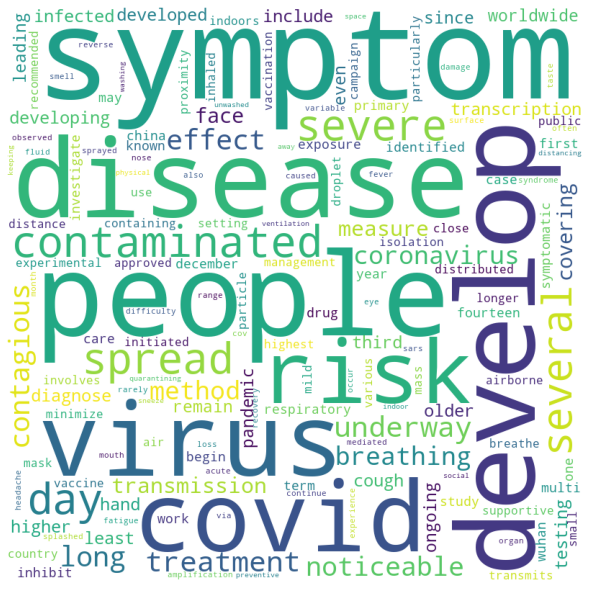

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## `Disadvantage`:
- TF-IDF lacks semantic meaning
### to overcome this we use `name-intent recognition(NER)`

# `END -------------------------------`